In [ ]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns


# A análise de correspondência múltipla

---
Ana Paula de S. Vanderley


É uma técnica estatística frequentemente utilizada para explorar relações entre variáveis categóricas em grandes conjuntos de dados. Neste trabalho, será empregada essa técnica para examinar o perfil dos alunos envolvidos em casos de bullying em uma determinada escola. Os dados foram coletados por meio de questionários aplicados aos alunos, contemplando informações como sexo, idade, raça, ocupação, estado civil, presença de filhos, renda e tipo de bullying praticado. Ao aplicar a análise de correspondência múltipla a esses dados, será possível identificar padrões e associações entre as diferentes variáveis, fornecendo insights valiosos para compreender melhor esse fenômeno e orientar ações de prevenção e intervenção.

BANCO DE DADOS

---



In [ ]:
df = pd.read_csv("pesquisa_alunos.csv" , sep = ';')
df.head(5)

,SEXO,IDADE,RACA,OCUPACAO,ESTADO CIVIL,FILHO,RENDA,TIPO DE BULLING QUE PRATICOU
0,masculino,entre10a15,negro,estudaetrabalha,solteiro,sim,ate1salario,PRATICOU VERBAL
1,masculino,entre10a15,parda,estudaetrabalha,naorespondeu,sim,ate1salario,PRATICOU INTERNET
2,masculino,entre10a15,parda,estudaetrabalha,casado,sim,ate1salario,PRATICOU INTERNET
3,masculino,entre15a20,parda,estuda,casado,sim,ate1salario,PRATICOU INTERNET
4,feminino,entre15a20,parda,estuda,casado,sim,mais2salarios,PRATICOU INTERNET


## ANÁLISE DE DADOS

---



In [ ]:
descricao = df.describe()
print("\nEstatísticas descritivas:")
descricao


Estatísticas descritivas:


,SEXO,IDADE,RACA,OCUPACAO,ESTADO CIVIL,FILHO,RENDA,TIPO DE BULLING QUE PRATICOU
count,126,126,126,126,126,126,126,126
unique,2,2,3,2,3,2,3,4
top,feminino,entre15a20,branca,estuda,casado,sim,mais3salarios,PRATICOU INTERNET
freq,71,93,67,93,52,74,52,63


Os dados  consistem em informações sobre 126 alunos relacionadas a oito variáveis: sexo, idade, raça, ocupação, estado civil, presença de filhos, renda e tipo de bullying praticado.

*  Sexo: Existem duas categorias, masculino e feminino. A maioria dos alunos (71) é do sexo feminino.
*  Idade: As idades dos alunos estão divididas em duas faixas, "entre 10 a 15" e "entre 15 a 20". A maioria dos alunos (93) está na faixa etária "entre 15 a 20".
*  Raça: Existem três categorias: negra, parda e branca. A categoria mais frequente é "branca", com 67 alunos.
*  Ocupação: Existem duas categorias, "estuda" e "estuda e trabalha". A maioria dos alunos (93) está na categoria "estuda".
*  Estado Civil: Existem três categorias: solteiro, casado e não respondido. A categoria mais frequente é "casado", com 52 alunos.
*  Filho: Os alunos foram divididos em duas categorias, "sim" e "não". A maioria dos alunos (74) tem filhos.
*  Renda: Existem três categorias de renda: "até 1 salário", "mais de 1 até 3 salários" e "mais de 3 salários". A categoria mais frequente é "mais de 3 *
 salários", com 52 alunos.
*  Tipo de Bullying Praticado: Existem quatro categorias de bullying praticado: verbal, internet, físico e emocional. A maioria dos alunos (63) praticou bullying do tipo "internet".

In [ ]:
print("\nContagem de valores únicos para cada variável categórica:")
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print()


Contagem de valores únicos para cada variável categórica:
SEXO
feminino     71
masculino    55
Name: count, dtype: int64

IDADE
entre15a20    93
entre10a15    33
Name: count, dtype: int64

RACA
branca    67
parda     48
negro     11
Name: count, dtype: int64

OCUPACAO
estuda             93
estudaetrabalha    33
Name: count, dtype: int64

ESTADO CIVIL
casado          52
solteiro        48
naorespondeu    26
Name: count, dtype: int64

FILHO
sim    74
nao    52
Name: count, dtype: int64

RENDA
mais3salarios    52
ate1salario      44
mais2salarios    30
Name: count, dtype: int64

TIPO DE BULLING QUE PRATICOU
PRATICOU INTERNET    63
NAO PRATICOU         37
PRATICOU FISICO      15
PRATICOU VERBAL      11
Name: count, dtype: int64



VISUALIZAÇÃO

---



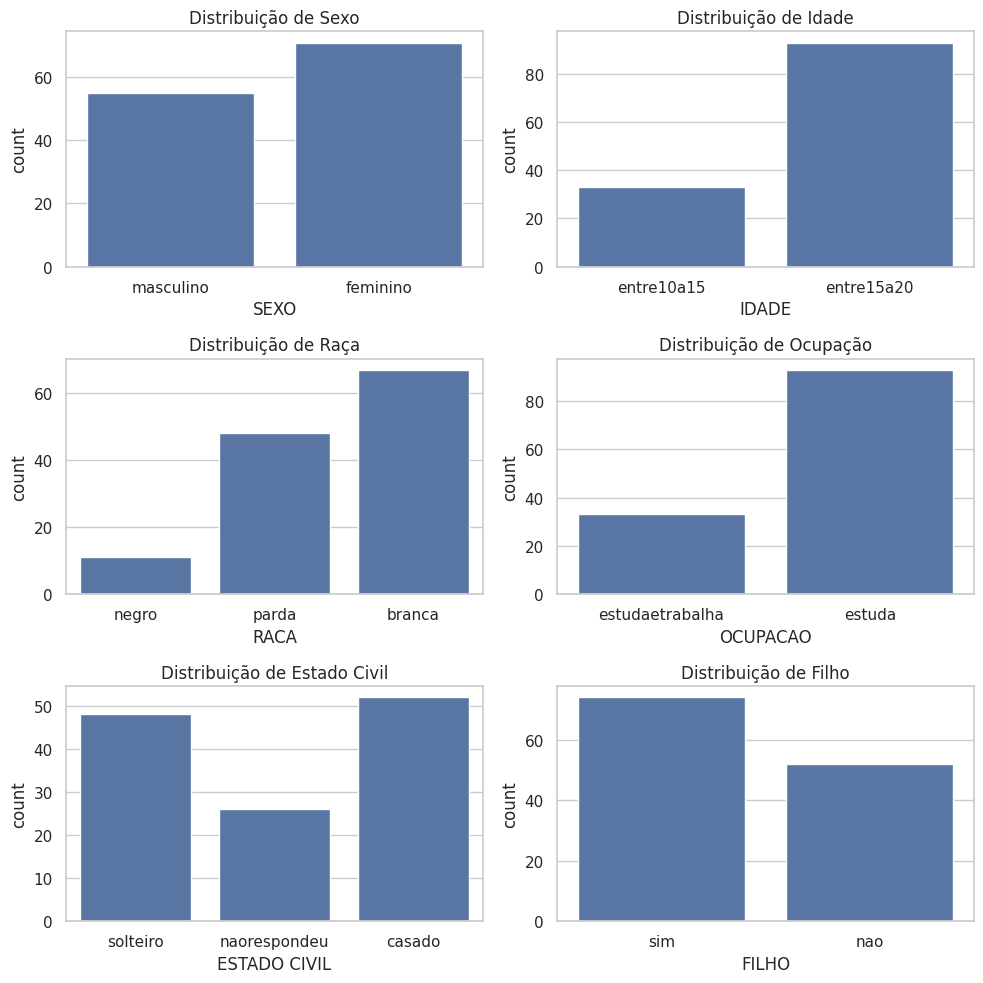

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 10))


plt.subplot(3, 2, 1)
sns.countplot(data=df, x='SEXO')
plt.title('Distribuição de Sexo')


plt.subplot(3, 2, 2)
sns.countplot(data=df, x='IDADE')
plt.title('Distribuição de Idade')


plt.subplot(3, 2, 3)
sns.countplot(data=df, x='RACA')
plt.title('Distribuição de Raça')


plt.subplot(3, 2, 4)
sns.countplot(data=df, x='OCUPACAO')
plt.title('Distribuição de Ocupação')


plt.subplot(3, 2, 5)
sns.countplot(data=df, x='ESTADO CIVIL')
plt.title('Distribuição de Estado Civil')


plt.subplot(3, 2, 6)
sns.countplot(data=df, x='FILHO')
plt.title('Distribuição de Filho')

plt.tight_layout()
plt.show()


## ENGENHARIA DE DADOS

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Primeiramente foi feita a codificação das variaveis , ou seja, foram categorizadas com valores númericos. Em seguida essas variáveis foram tranformadas em variáveis do tipo Dummy onde cada categoria virou uma variável e seus valores foram preenchidos com opções dicotomicas 0 ou 1 .

In [ ]:
colunas_categoricas = ['TIPO DE BULLING QUE PRATICOU','SEXO', 'IDADE', 'RACA', 'OCUPACAO', 'ESTADO CIVIL', 'FILHO', 'RENDA']


encoder = OneHotEncoder()

dados_transformados = encoder.fit_transform(df[colunas_categoricas])
df_codificado = pd.DataFrame(dados_transformados.toarray(), columns=encoder.get_feature_names_out(colunas_categoricas))
preprocessed_df = pd.concat([df.drop(columns=colunas_categoricas), df_codificado], axis=1)


print("Primeiras linhas do DataFrame após a codificação:")
print(preprocessed_df.head())

Primeiras linhas do DataFrame após a codificação:
   TIPO DE BULLING QUE PRATICOU_NAO PRATICOU  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   TIPO DE BULLING QUE PRATICOU_PRATICOU FISICO  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   TIPO DE BULLING QUE PRATICOU_PRATICOU INTERNET  \
0                                             0.0   
1                                             1.0   
2                                             1.0   
3                                             1.0   
4                                             1.0   

   TIPO DE BULLING QUE PRATICOU_PRA

TRANSFORMANDO VARIÁVEIS CATEGORICAS EM VARIÁVEIS DUMMY

---



In [ ]:
df_encoded = pd.get_dummies(preprocessed_df)

In [ ]:
df_encoded.head(10)

,TIPO DE BULLING QUE PRATICOU_NAO PRATICOU,TIPO DE BULLING QUE PRATICOU_PRATICOU FISICO,TIPO DE BULLING QUE PRATICOU_PRATICOU INTERNET,TIPO DE BULLING QUE PRATICOU_PRATICOU VERBAL,SEXO_feminino,SEXO_masculino,IDADE_entre10a15,IDADE_entre15a20,RACA_branca,RACA_negro,...,OCUPACAO_estuda,OCUPACAO_estudaetrabalha,ESTADO CIVIL_casado,ESTADO CIVIL_naorespondeu,ESTADO CIVIL_solteiro,FILHO_nao,FILHO_sim,RENDA_ate1salario,RENDA_mais2salarios,RENDA_mais3salarios
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## CIÊNCIA DE DADOS

---



In [ ]:
from prince import MCA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

TREINANDO O MODELO MCA

---
A Análise de Correspondência Múltipla (ACM) é uma técnica estatística utilizada para explorar associações entre variáveis categóricas em grandes conjuntos de dados. Ela é uma extensão da Análise de Correspondência Simples (ACS), que é usada para analisar associações entre duas variáveis categóricas. A ACM permite a análise simultânea de várias variáveis categóricas, buscando identificar padrões e estruturas nos dados.

Na ACM, as variáveis categóricas são representadas como pontos em um espaço de baixa dimensão, chamado espaço de coordenadas. As distâncias e direções entre esses pontos refletem as associações entre as categorias das variáveis. A técnica busca encontrar uma representação visual dos dados que preserve as relações entre as categorias, permitindo uma interpretação mais clara dos padrões presentes nos dados.



In [ ]:
mca = MCA(n_components=2)
mca.fit(df_encoded)

MCA()

COORDENADAS

---



In [ ]:
coordenadas = mca.transform(df_encoded)
print(coordenadas)

            0         1
0    0.889784  0.928359
1    0.928939  0.230464
2    0.987988  0.023850
3    0.462379 -0.380732
4    0.136807 -0.785064
..        ...       ...
121  0.462379 -0.380732
122  0.136807 -0.785064
123 -0.087266 -0.683318
124 -0.755124  0.229487
125 -0.712686  0.162925

[126 rows x 2 columns]


. Essas coordenadas representam a posição de cada categoria das variáveis no espaço de baixa dimensão.

CORRELAÇÕES

---



In [ ]:
# Calculando as correlações entre os tipos de bullying com base nas coordenadas dos pontos no espaço MCA
correlacoes_bullying = coordenadas.groupby(df['TIPO DE BULLING QUE PRATICOU']).corr()
print("Correlações entre os tipos de bullying com base nas coordenadas dos pontos no espaço MCA:")
print(correlacoes_bullying)

Correlações entre os tipos de bullying com base nas coordenadas dos pontos no espaço MCA:
                                       0         1
TIPO DE BULLING QUE PRATICOU                      
NAO PRATICOU                 0  1.000000  0.801157
                             1  0.801157  1.000000
PRATICOU FISICO              0       NaN       NaN
                             1       NaN       NaN
PRATICOU INTERNET            0  1.000000  0.942998
                             1  0.942998  1.000000
PRATICOU VERBAL              0       NaN       NaN
                             1       NaN       NaN


Para os casos em que o bullying foi "NAO PRATICOU" ou "PRATICOU INTERNET", a correlação é de 1. Apontando  que essas categorias estão fortemente associadas dentro do mesmo tipo de bullying.

A correlação entre "NAO PRATICOU" e "PRATICOU INTERNET" é de 0.801157, o que indica uma associação positiva considerável entre esses dois tipos de bullying.

A correlação entre "PRATICOU INTERNET" e "PRATICOU VERBAL" é de 0.942998, mostrando uma associação forte entre esses dois tipos de bullying.

VARIÂNCIA EXPLICADA

---



In [ ]:
total_inertia = mca.total_inertia_
explained_variance_ratio = total_inertia / np.sum(total_inertia)
print("Variância Explicada:", explained_variance_ratio)

Variância Explicada: 1.0


A Variância Explicada de 1.0 significa que todos os componentes principais retidos na análise (ou seja, todas as dimensões no espaço de coordenadas) conseguem explicar completamente a variabilidade presente nos dados. Isso indica que não há perda de informação ao projetar os dados no espaço de coordenadas determinado pela análise. Todos os padrões e estruturas presentes nos dados foram capturados pelos componentes principais.

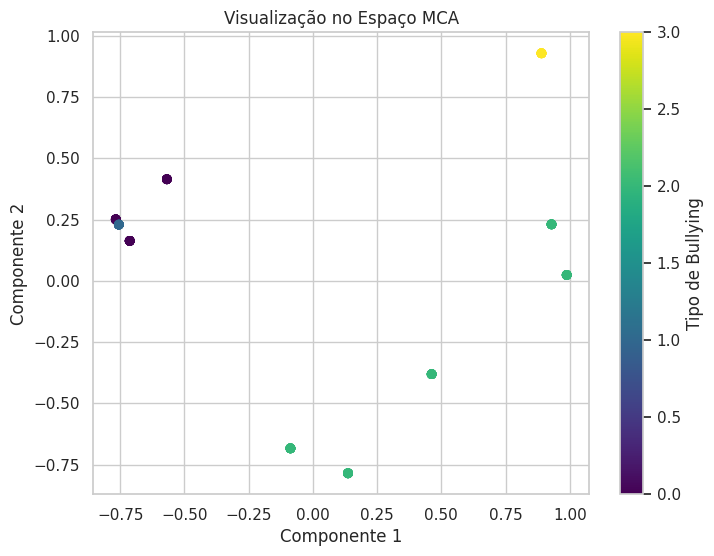

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(coordenadas.iloc[:, 0], coordenadas.iloc[:, 1], c=df['TIPO DE BULLING QUE PRATICOU'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualização no Espaço MCA')
plt.colorbar(label='Tipo de Bullying')
plt.grid(True)
plt.show()


COMTRIBUIÇÕES DAS VARIÁVEIS

---
Podemos notar uma forte contribuição no Componente 1 das variaveis rendamais2salarios e estadocivilcasado por exemplo.


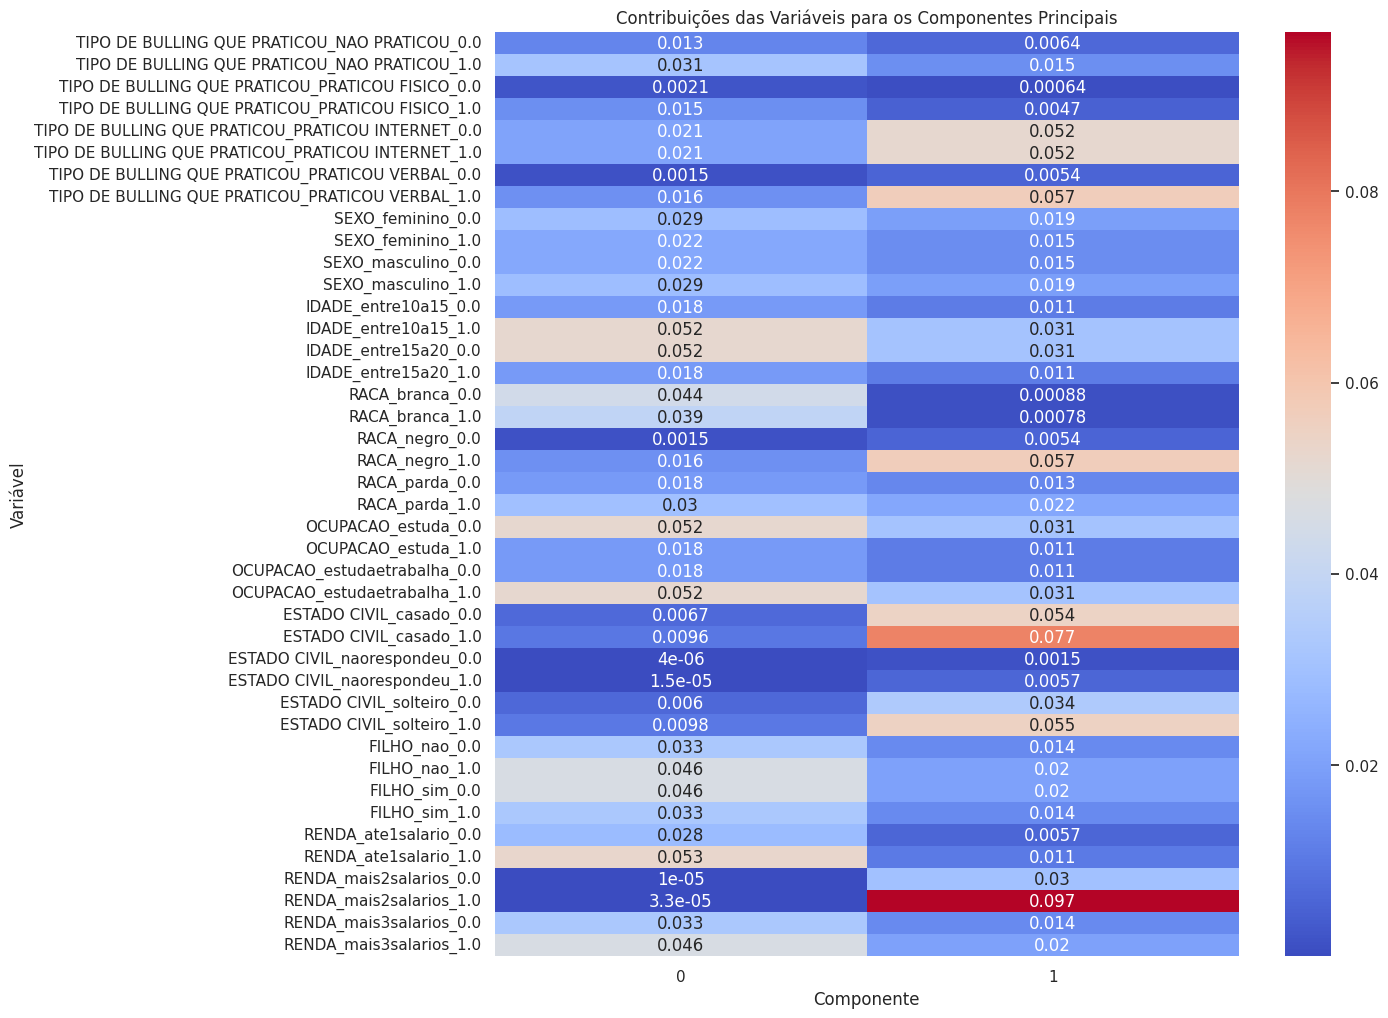

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(mca.column_contributions_, annot=True, cmap='coolwarm')
plt.xlabel('Componente')
plt.ylabel('Variável')
plt.title('Contribuições das Variáveis para os Componentes Principais')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

tipos_bullying = ['TIPO DE BULLING QUE PRATICOU_NAO PRATICOU',
                  'TIPO DE BULLING QUE PRATICOU_PRATICOU FISICO',
                  'TIPO DE BULLING QUE PRATICOU_PRATICOU INTERNET',
                  'TIPO DE BULLING QUE PRATICOU_PRATICOU VERBAL']

In [ ]:
for tipo_bullying in tipos_bullying:
    if tipo_bullying not in df_encoded.columns:
        print(f"A coluna '{tipo_bullying}' não está presente no DataFrame.")
        exit()

OBTENDO AS COORDENADAS E OBTENDO AS CARGAS DAS CARACTERISTICAS

---
As coordenadas representam as relações entre as categorias das variáveis categóricas no espaço de coordenadas determinado pela análise de correspondência múltipla (ACM).




 *  As categorias "NAO PRATICOU" e "PRATICOU INTERNET" estão localizadas em direções opostas nos dois primeiros componentes principais, indicando uma relação de oposição entre elas.

*  As categorias relacionadas ao sexo e à idade também estão distantes no espaço de coordenadas. Por exemplo, "SEXO_feminino" está em uma direção oposta a "SEXO_masculino", enquanto "IDADE_entre10a15" e "IDADE_entre15a20" estão em direções opostas, ou seja há diferenças significativas nessas variáveis.

*  As categorias relacionadas à raça, ocupação, estado civil, presença de filhos e renda também estão distribuídas no espaço de coordenadas, mostrando diferentes associações entre essas variáveis. "RACA_branca" está localizada em uma direção oposta a "RACA_parda", sugerindo diferenças na distribuição dessas raças em relação aos outros componentes.


In [ ]:
coordenadas_linhas = mca.row_coordinates(df_encoded)
cargas_caracteristicas = df_encoded.T.dot(coordenadas_linhas)
print(cargas_caracteristicas)

                                                        0          1
TIPO DE BULLING QUE PRATICOU_NAO PRATICOU      -25.376237   9.762077
TIPO DE BULLING QUE PRATICOU_PRATICOU FISICO   -11.326858   3.442298
TIPO DE BULLING QUE PRATICOU_PRATICOU INTERNET  26.915474 -23.416328
TIPO DE BULLING QUE PRATICOU_PRATICOU VERBAL     9.787621  10.211953
SEXO_feminino                                  -29.710185 -13.379763
SEXO_masculino                                  29.710185  13.379763
IDADE_entre10a15                                30.873815  13.009412
IDADE_entre15a20                               -30.873815 -13.009412
RACA_branca                                    -38.012090   2.954605
RACA_negro                                       9.787621  10.211953
RACA_parda                                      28.224469 -13.166558
OCUPACAO_estuda                                -30.873815 -13.009412
OCUPACAO_estudaetrabalha                        30.873815  13.009412
ESTADO CIVIL_casado               

VISUALIZAÇÃO

---



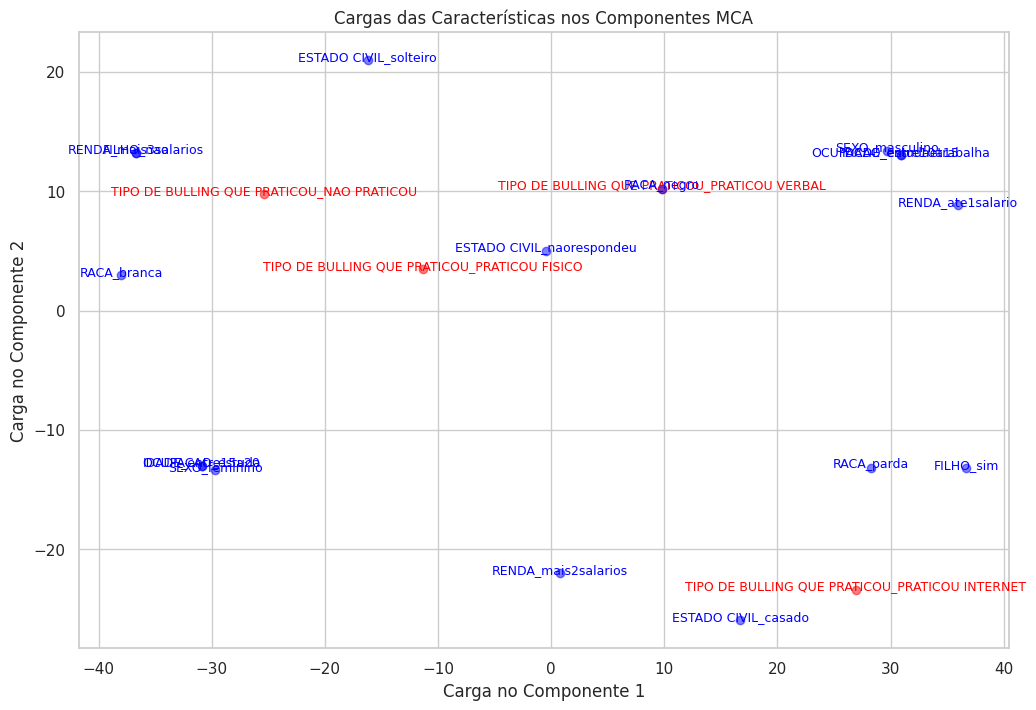

In [ ]:
caracteristicas = cargas_caracteristicas.index
cargas_componente_1 = cargas_caracteristicas[0].values
cargas_componente_2 = cargas_caracteristicas[1].values


plt.figure(figsize=(12, 8))
for i, caracteristica in enumerate(caracteristicas):
    cor = 'red' if caracteristica.startswith('TIPO') else 'blue'
    plt.scatter(cargas_componente_1[i], cargas_componente_2[i], color=cor, alpha=0.5)

    plt.text(cargas_componente_1[i], cargas_componente_2[i] + 0.3, caracteristica, fontsize=9, ha='center', va='center', color=cor)

plt.xlabel('Carga no Componente 1')
plt.ylabel('Carga no Componente 2')
plt.title('Cargas das Características nos Componentes MCA')
plt.show()


Pela análise gráfica podemos ver a distribuição dessas variáveis e notar que o bulling praticado na internet esta mais associado nesse caso a perfil de alunos casado, com renda de mais de 2 salários , que tem filhos e é da raça parda.
Já pessoas da que se declararam negras, com renda de at-e um salário , do sexo masculino e que não trabalha estão mais associados com a prática de bulling verbal.